# Diabetes Prediction Analysis

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [170]:
#Importing dataset:

diabetes = pd.read_csv("diabetes.csv")
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [171]:
#Data Exploration:

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [172]:
#Checking for Duplicate values:

print("Duplicate values: ", diabetes.duplicated().sum())

Duplicate values:  0


In [173]:
#Describe the data

diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [174]:
#Checking for null values:

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [175]:
#Extravting columns:

diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [176]:
#Checking the null values:

diabetes.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [177]:
diabetes.isnull().tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,False,False,False,False,False,False,False,False,False
759,False,False,False,False,False,False,False,False,False
760,False,False,False,False,False,False,False,False,False
761,False,False,False,False,False,False,False,False,False
762,False,False,False,False,False,False,False,False,False
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False
767,False,False,False,False,False,False,False,False,False


In [178]:
diabetes.isnull().sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
705,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False
222,False,False,False,False,False,False,False,False,False
713,False,False,False,False,False,False,False,False,False
511,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,False
141,False,False,False,False,False,False,False,False,False


# Data Visualization

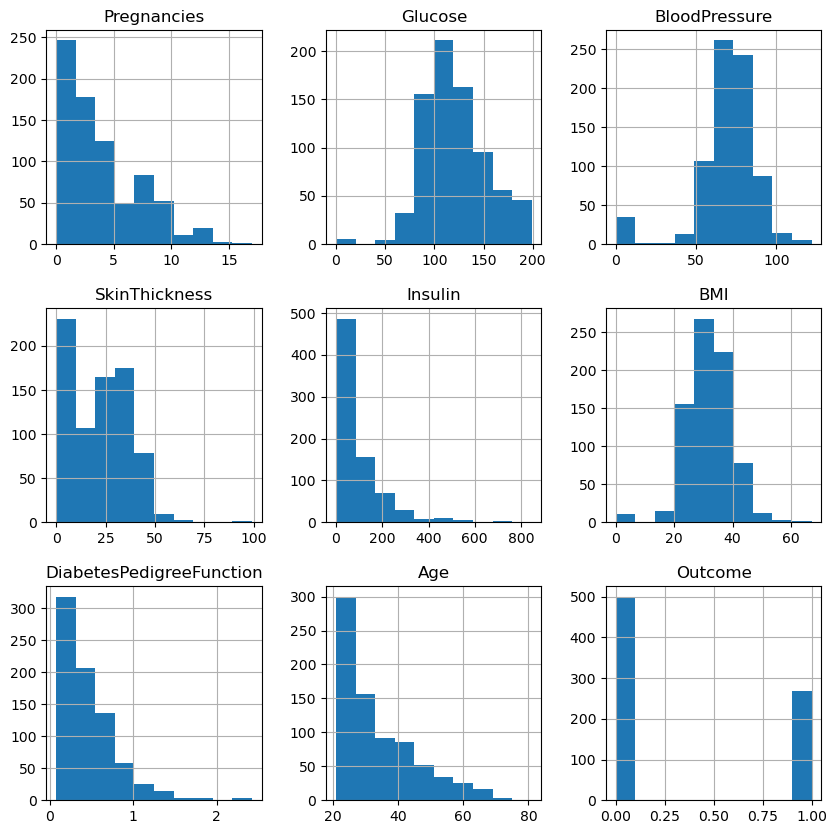

In [217]:
dff = diabetes.hist(figsize=(10,10))

<Axes: ylabel='Density'>

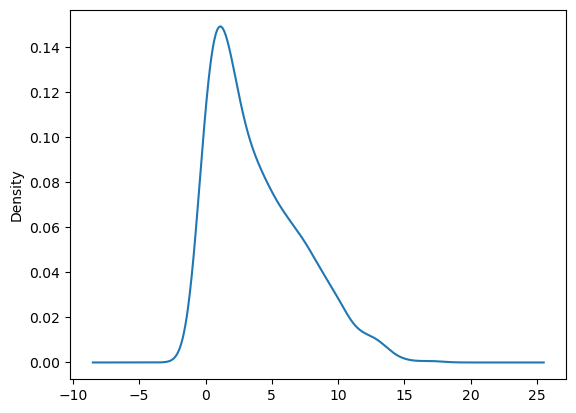

In [179]:
diabetes['Pregnancies'].plot(kind='density')

<Axes: ylabel='Density'>

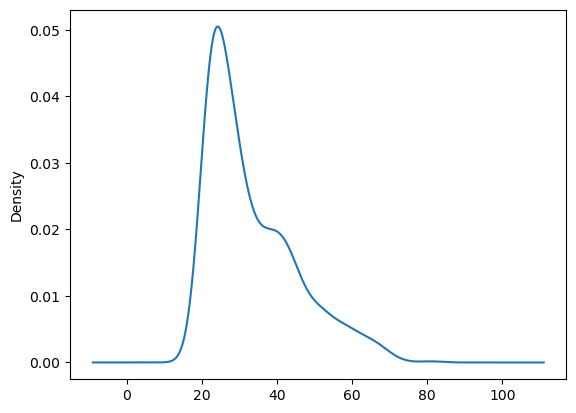

In [216]:
diabetes['Age'].plot(kind='density')

<Axes: ylabel='Density'>

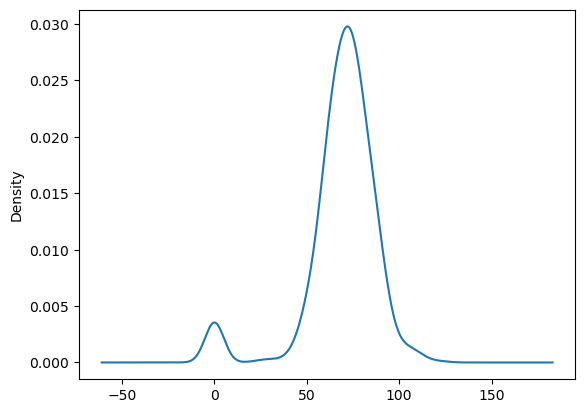

In [181]:
diabetes['BloodPressure'].plot(kind='density')

<Axes: ylabel='Density'>

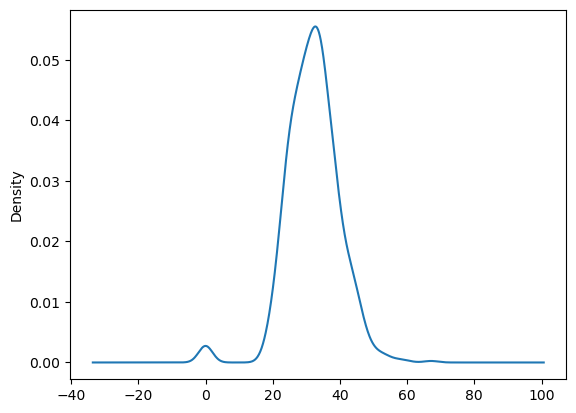

In [182]:
diabetes['BMI'].plot(kind='density')

<Axes: ylabel='Density'>

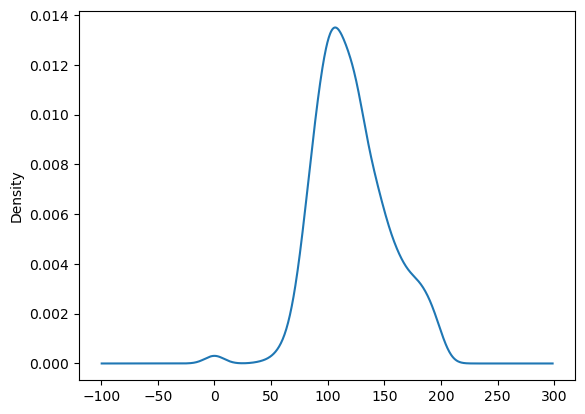

In [184]:
diabetes['Glucose'].plot(kind='density')

<Axes: ylabel='Density'>

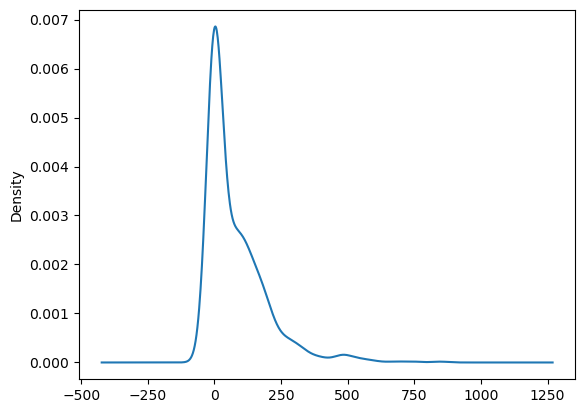

In [185]:
diabetes['Insulin'].plot(kind='density')

<Axes: ylabel='Density'>

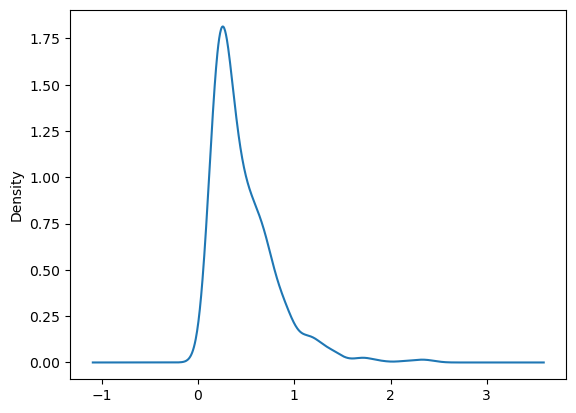

In [186]:
diabetes['DiabetesPedigreeFunction'].plot(kind='density')

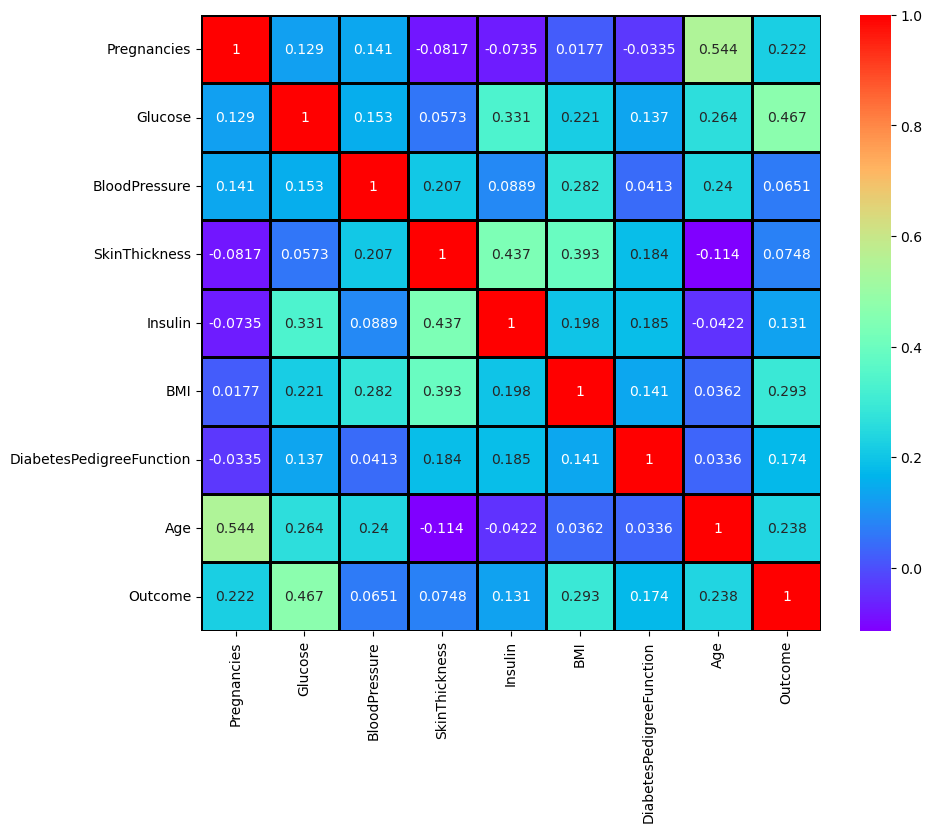

In [187]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(),cmap='rainbow',annot=True,fmt='.3g',linecolor="k",linewidths=2)
plt.show()

In [190]:
#Preparing the data into input and output variables.

array = diabetes.values
x = array[:,0:-1]
y = array[:,-1]

In [191]:
#Normalizing the datasetusing the minmax scaling method.

names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Check the shape of 'x' before scaling
print("Shape of x before scaling:", x.shape)

scaler = preprocessing.MinMaxScaler()
diabetes_scaled = scaler.fit_transform(x)

# Check the shape of 'diabetes_scaled' to ensure it has the same number of columns
print("Shape of scaled data:", diabetes_scaled.shape)

Shape of x before scaling: (768, 8)
Shape of scaled data: (768, 8)


In [192]:
# Create the DataFrame with the scaled data and column names
scaled_data = pd.DataFrame(diabetes_scaled, columns=names)
scaled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [220]:
data1 = diabetes['Outcome']
data1.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [221]:
data1.tail(10)

758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, dtype: int64

In [206]:
right = pd.DataFrame(data1)
left = pd.DataFrame(scaled_data)
data2=left.join(right)
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [207]:
array = data2.values
X = array[:,0:-1]
Y = array[:,-1]

In [223]:
X_train,X_test,Y_train,Y_test = train_test_split(X,X,test_size=0.30, random_state=7)

# Create the Model

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
Recursion = LogisticRegression()
Recursion.fit(X_train, Y_train.ravel())

# Make predictions on the test set
predictions = Recursion.predict(X_test)

# Evaluate the model
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        99
         1.0       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

